In [1]:
import pandas as pd
# 控制pandas在Notebook中的显示
pd.options.display.max_columns = None
pd.options.display.max_rows = 10

# 流失主表，包含主要信息
df = pd.read_csv("./data/churn_data.csv")
print("数据维度信息: {}".format(df.shape))
df.head()

数据维度信息: (7043, 9)


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
img_path= '/Users/leepand/Documents/papers-ml/MLOps/images/end-2-end-demo'

In [2]:
# 用户人口统计信息
customer = pd.read_csv("./data/customer_data.csv")
print("数据维度信息: {}".format(customer.shape))
customer.head()

数据维度信息: (7043, 5)


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [3]:
# 合约信息
contract = pd.read_csv("./data/internet_data.csv")
print("数据维度信息: {}".format(contract.shape))
contract.head()

数据维度信息: (7043, 9)


,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [4]:
# 数据字典. 
meta = pd.read_csv("./data/Telecom Churn Data Dictionary.csv")
meta.head()

,S.No.,VariableName,Meaning
0,1,CustomerID,The unique ID of each customer
1,2,Gender,The gender of a person
2,3,SeniorCitizen,Whether a customer can be classified as a seni...
3,4,Partner,If a customer is married/ in a live-in relatio...
4,5,Dependents,If a customer has dependents (children/ retire...


In [5]:
for i in [df, customer, contract]:
    i.set_index("customerID",inplace=True)
print("数据维度信息: {}".format(df.shape))
df.head()

数据维度信息: (7043, 8)


,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# 连接所有三个数据集（一个接一个），以customerID为索引
df = df.join(customer).join(contract)

# 确保没有1:N的关系，即没有重复，再次打印数据维度（与上面输入的行数进行对比）
print("整合后的数据维度信息: {}".format(df.shape))
df.head()

整合后的数据维度信息: (7043, 20)


,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [7]:
def check_stats(df):
    """
    返回一个显示主要统计数据和附加指标的表格（数据框）
    """
    # 把数据类型存储在一哥个独立的数据框架中
    dfinfo = pd.DataFrame(df.dtypes,columns=["dtypes"])
    # 计算缺失记录总和. 
    dfinfo = dfinfo.join((df.replace({'':None,' ':None}) if "('O')" in str(df.dtypes.values) else df).isna().sum().rename("isna"))

    # 在最后一步，添加统计数据（仅对数值列进行计算）
    return dfinfo.T.append(df.describe(),sort=False)

check_stats(df).T.query("isna != 0")


,dtypes,isna,count,mean,std,min,25%,50%,75%,max
TotalCharges,object,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
telco2 = df.copy()
# we are converting all the values in the TotalCharges data to float, 
# However, for blank strings we are going to impute nan ... errors= 'coerce'
telco2['TotalCharges'] = pd.to_numeric(telco2['TotalCharges'],errors= 'coerce')

In [11]:
df.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
import numpy as np
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors= 'coerce')
df.TotalCharges = df.TotalCharges.replace(to_replace=np.nan, value= df.TotalCharges.median())
check_stats(df).T.query("isna != 0")


,dtypes,isna,count,mean,std,min,25%,50%,75%,max


In [149]:
check_stats(df).T.query("isna != 0")


,dtypes,isna,count,mean,std,min,25%,50%,75%,max
TotalCharges,float64,11,7032,2283.3,2266.77,18.8,401.45,1397.47,3794.74,8684.8


In [150]:
telco.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00


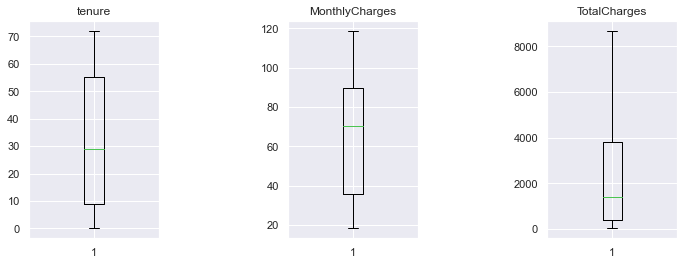

In [66]:
tele = telco.copy()
fig, axs = plt.subplots(1, 3)

axs[0].boxplot(tele['tenure'])
axs[0].set_title('tenure')
axs[1].boxplot(tele['MonthlyCharges'])
axs[1].set_title('MonthlyCharges')
axs[2].boxplot(tele['TotalCharges'])
axs[2].set_title('TotalCharges')

fig.subplots_adjust(left=0.5, right=2,wspace=1)

plt.show()


/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


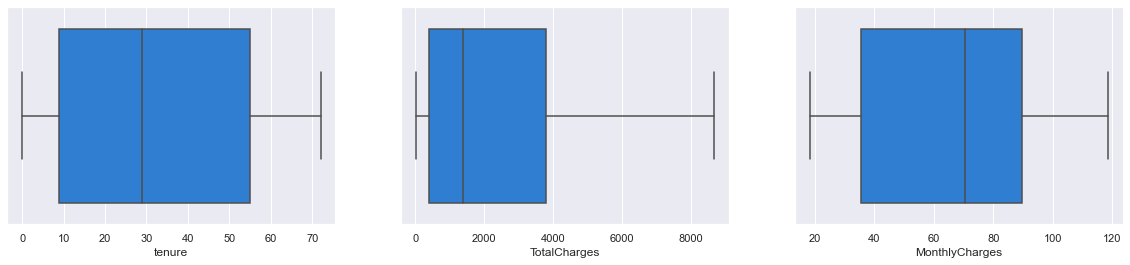

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

#checking outliers for tenure, TotalCharges and MonthlyCharges
plt.figure(figsize=[20,4])
plt.subplot(1,3,1)
sns.boxplot(telco.tenure)
plt.subplot(1,3,2)
sns.boxplot(telco.TotalCharges)
plt.subplot(1,3,3)
sns.boxplot(telco.MonthlyCharges)
#plt.show()
plt.savefig(img_path+"/outliers-check.png")

In [49]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00


In [65]:
# Looks to be a significant amount of variation in total charges
# 关注 5% to 95%
Perc5 = round(np.percentile(telco['TotalCharges'],5),2)
Perc95 = round(np.percentile(telco['TotalCharges'],95),2)

print('重点关注总费用介于${}与${}.的用户'.format(Perc5,Perc95))
# 过滤数据集
df = telco.loc[(telco['TotalCharges'] <= Perc95) & (telco['TotalCharges'] >= Perc5)]

重点关注总费用介于$49.65与$6921.02.的用户


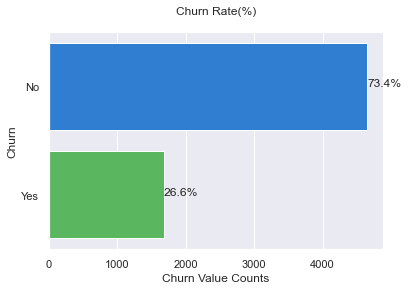

In [104]:
def bar_plot(df,column):    
    ax = sns.countplot(y=column, data=df)
    plt.title('Churn Rate(%)\n')
    plt.xlabel('Churn Value Counts')

    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.04
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    #plt.show()
    plt.savefig(img_path+"/churn-rate.png")
bar_plot(df, "Churn")

/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

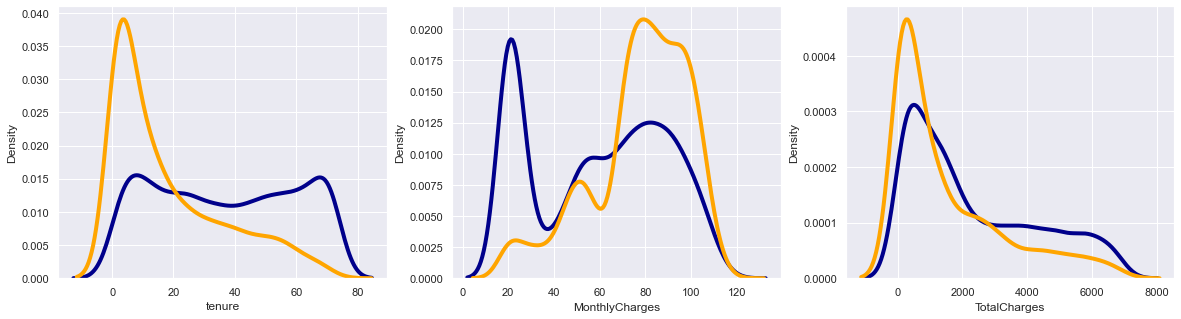

In [117]:
plt.figure(figsize=[20,5])
plt.title("Plot for {}".format("tenure"))
plt.subplot(1,3,1)
ax0 = sns.distplot(df[df['Churn'] == 'No']["tenure"].dropna(), hist=False, kde=True, 
                   color = 'darkblue',  label= 'Churn: No',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4})
ax1 = sns.distplot(df[df['Churn'] == 'Yes']["tenure"].dropna(), hist=False, kde=True, 
                   color = 'orange',  label= 'Churn: Yes',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4}) 
plt.subplot(1,3,2)
ax0 = sns.distplot(df[df['Churn'] == 'No']["MonthlyCharges"].dropna(), hist=False, kde=True, 
                   color = 'darkblue',  label= 'Churn: No',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4})
ax1 = sns.distplot(df[df['Churn'] == 'Yes']["MonthlyCharges"].dropna(), hist=False, kde=True, 
                   color = 'orange',  label= 'Churn: Yes',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4}) 
plt.subplot(1,3,3)
ax0 = sns.distplot(df[df['Churn'] == 'No']["TotalCharges"].dropna(), hist=False, kde=True, 
                   color = 'darkblue',  label= 'Churn: No',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4})
ax1 = sns.distplot(df[df['Churn'] == 'Yes']["TotalCharges"].dropna(), hist=False, kde=True, 
                   color = 'orange',  label= 'Churn: Yes',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4}) 
#kdeplot('tenure', hist = False, kde = True,i=1)
#kdeplot('MonthlyCharges', hist = False, kde = True,i=2)
#kdeplot('TotalCharges', hist = False, kde = True,i=3)
#plt.show()
plt.savefig(img_path+"/kde-num-feat.png")

/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

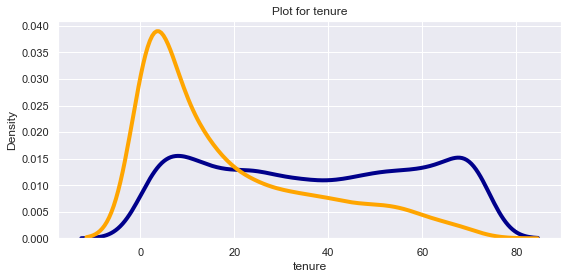

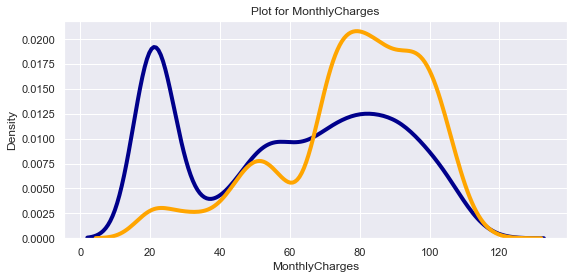

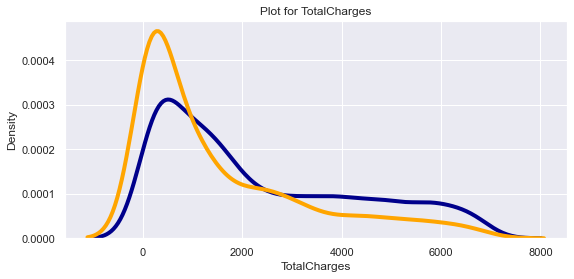

In [119]:
def kdeplot(feature, hist, kde):
    plt.figure(figsize=(9, 4))
    plt.title("Plot for {}".format(feature))
    ax0 = sns.distplot(df[df['Churn'] == 'No'][feature].dropna(), hist=hist, kde=kde, 
             color = 'darkblue',  label= 'Churn: No',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax1 = sns.distplot(df[df['Churn'] == 'Yes'][feature].dropna(), hist=hist, kde=kde, 
             color = 'orange',  label= 'Churn: Yes',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
kdeplot('tenure', hist = False, kde = True)
kdeplot('MonthlyCharges', hist = False, kde = True)
kdeplot('TotalCharges', hist = False, kde = True)

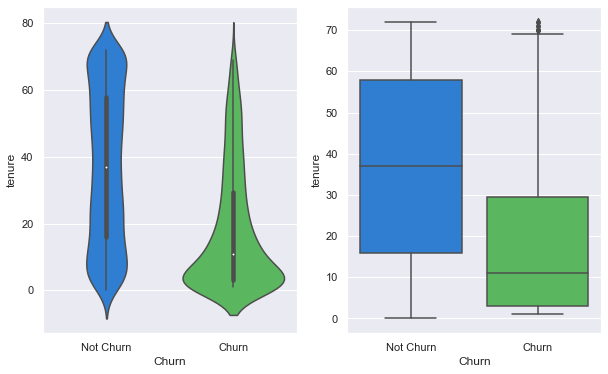

In [124]:
fig,axes = plt.subplots(1,2,figsize=(10,6))
ax1=sns.violinplot(x='Churn', y='tenure', data=df,ax=axes[0])
ax1.set_xticklabels(['Not Churn','Churn'])
ax2=sns.boxplot(x='Churn', y='tenure', data=df,ax=axes[1])
ax2.set_xticklabels(['Not Churn','Churn'])
plt.savefig(img_path+"/tenure-beh.png")

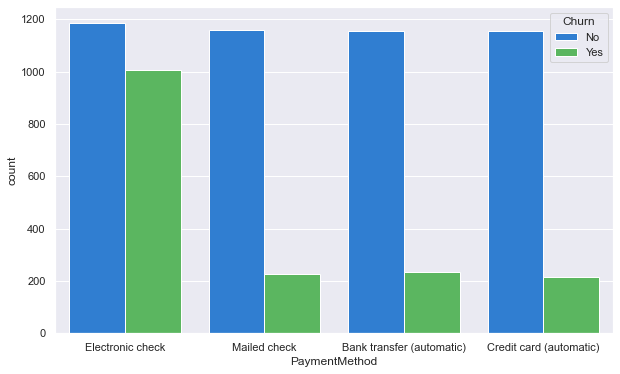

In [128]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod',
              hue='Churn',
              data=df,
              order=['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'])
plt.savefig(img_path+"/paymethod-churn.png")

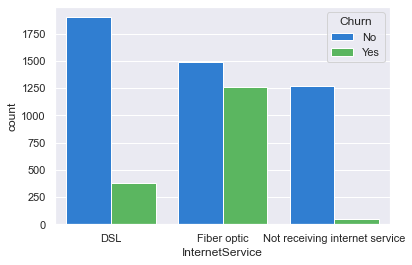

In [131]:
ax=sns.countplot(x='InternetService',hue='Churn',data=df,order=['DSL','Fiber optic','No'])
ax.set_xticklabels(['DSL','Fiber optic','Not receiving internet service'])
plt.savefig(img_path+"/inter-service.png")

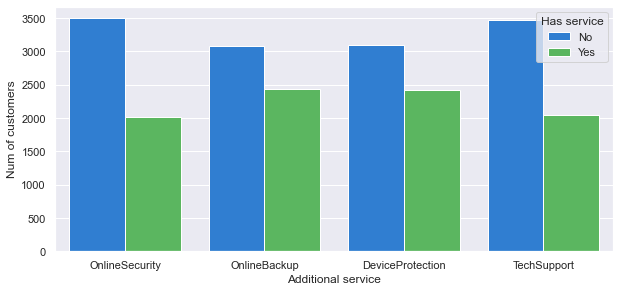

In [154]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]
df_new = df.copy()
df_service = pd.melt(df_new[df_new["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df_service, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
#plt.show()
plt.savefig(img_path+"/add-service.png")

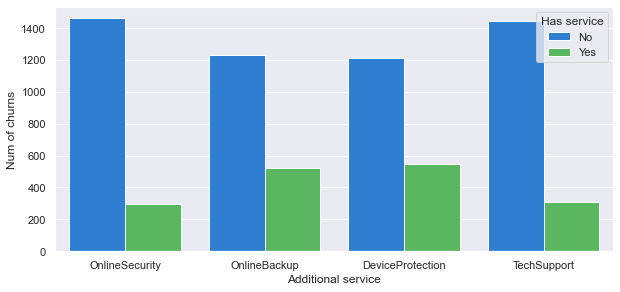

In [159]:
plt.figure(figsize=(10, 4.5))
df_new = df.copy()
df_service = df_new[(df_new.InternetService != "No") & (df_new.Churn == "Yes")]
df_service = pd.melt(df_service[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df_service, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.savefig(img_path+"/add-service.png")

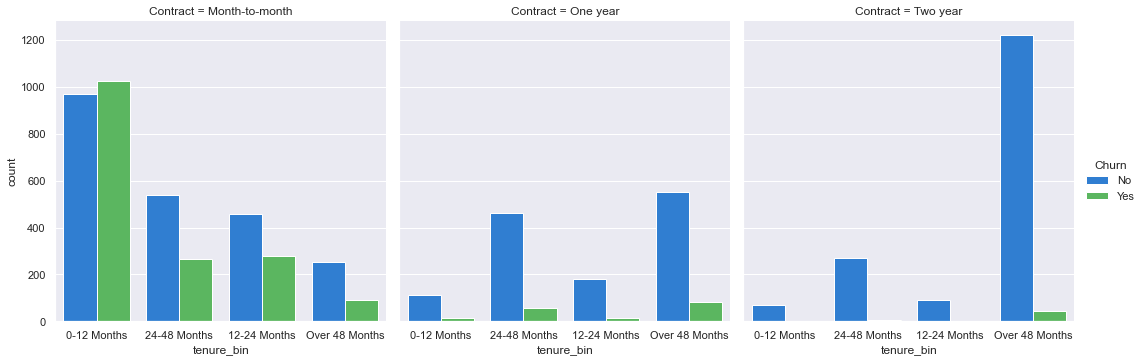

In [164]:
def bingroup(tenure):
    if tenure < 13:
        return "0-12 Months"
    elif tenure < 25:
        return "12-24 Months"
    elif tenure < 49:
        return "24-48 Months"
    else:
        return "Over 48 Months"
    
df_bins=df.copy()
df_bins["tenure_bin"] = df_bins["tenure"].apply(bingroup)

sns.catplot(data=df_bins, x="tenure_bin", hue="Churn", kind="count",
            col="Contract");

plt.savefig(img_path+"/tenure-bins.png")

/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


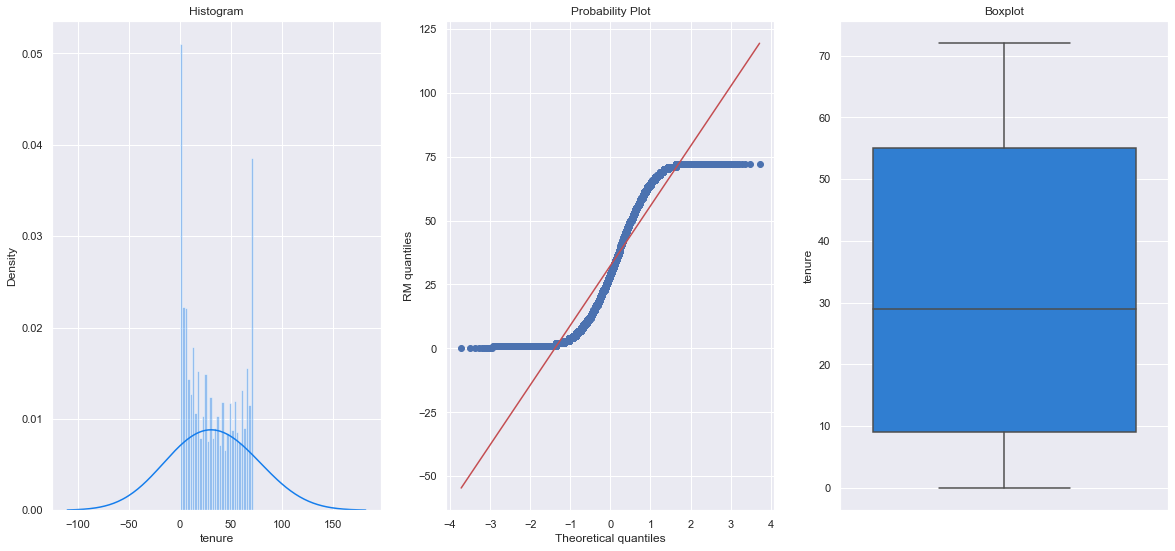

/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


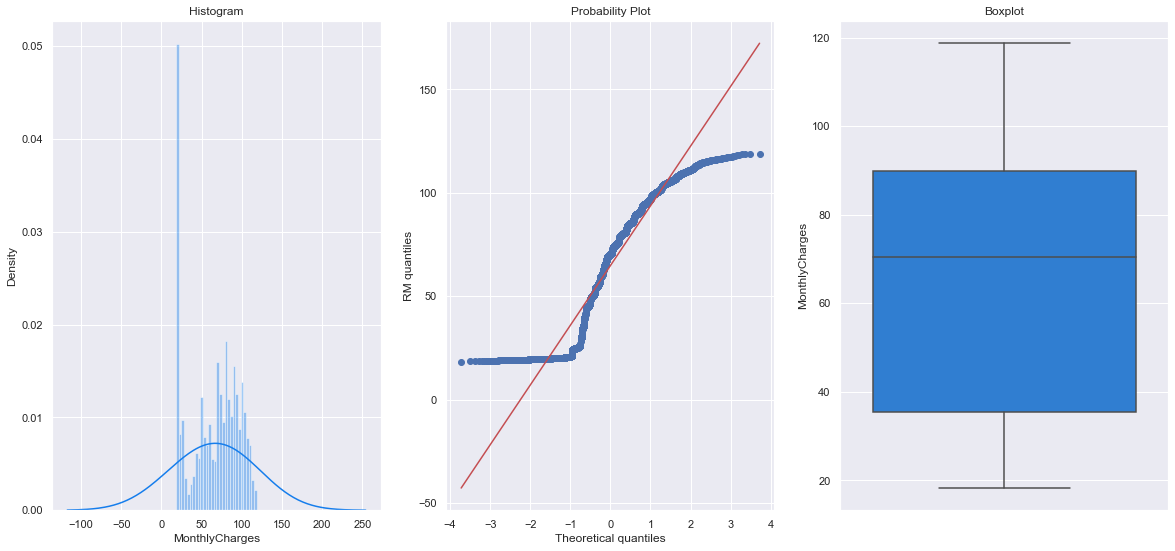

/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


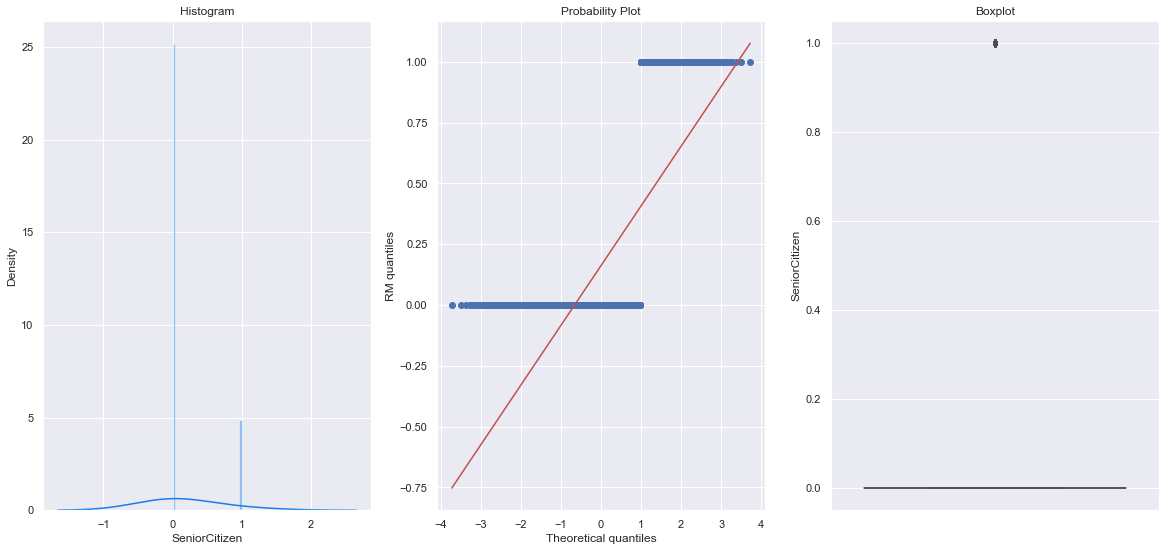

In [169]:
from scipy import stats

def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30,kde_kws={'bw': 1.5})
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()
    
num_columns=df_new.select_dtypes(exclude=["object"]).columns
for i in num_columns:
    diagnostic_plots(df_new,i)

/Users/leepand/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


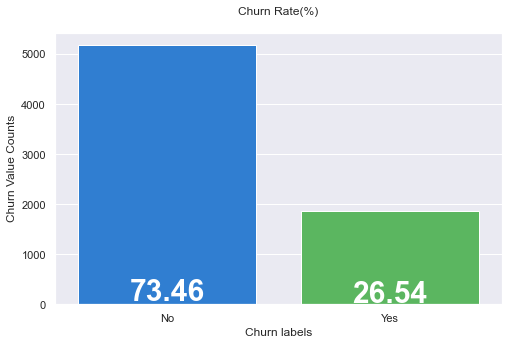

In [85]:
# Total Churn Rate:
tele = df.cop
churn_x = tele.Churn.unique()
churn_y = tele.Churn.value_counts()
plt.figure(figsize=[8,5])
plt.title("Churn Rate(%)\n")
sns.barplot(churn_x,churn_y, orient="v")
plt.xlabel("Churn labels")
plt.ylabel("Churn Value Counts")

label = (tele.Churn.value_counts(normalize=True)*100).round(2)
for i in range(2):
    plt.text(x = i, y = label[i], s = label[i],horizontalalignment='center',rotation = 360, color = "white", 
             weight="bold", fontsize=30)

plt.show()

In [10]:
# for visualization purposes, we will store the results in pandas dataframe and print the result in the next jupyter notebook cell
# nr of unique: will count the number of unique entries
# first 5 unique: will show first 5 unique entries (if less, only those)
dfsummary = pd.DataFrame({"number_of_unique":[],"first_5_unique":[]})

# Run loop over all columns computing length (len) of unique entries in each column and converting first 5 enties to a string
for i in df.columns:
    dfsummary = pd.concat([dfsummary,pd.DataFrame({"number_of_unique":[len(df[i].unique())],
                                                   "first_5_unique":[str(df[i].unique()[0:5])]},index=[i])],sort=False)
    
dfsummary

,number_of_unique,first_5_unique
tenure,73.0,[ 1 34 2 45 8]
PhoneService,2.0,['No' 'Yes']
Contract,3.0,['Month-to-month' 'One year' 'Two year']
PaperlessBilling,2.0,['Yes' 'No']
PaymentMethod,4.0,['Electronic check' 'Mailed check' 'Bank trans...
...,...,...
OnlineBackup,3.0,['Yes' 'No' 'No internet service']
DeviceProtection,3.0,['No' 'Yes' 'No internet service']
TechSupport,3.0,['No' 'Yes' 'No internet service']
StreamingTV,3.0,['No' 'Yes' 'No internet service']


In [11]:
def df_feat_summary(df):
    summary = pd.DataFrame({"number_of_unique":[],"first_5_unique":[]})
    for i in df.columns:
        summary = pd.concat([summary,
                             pd.DataFrame({"number_of_unique":[len(df[i].unique())],
                                           "first_5_unique":[str(df[i].unique()[0:5])]},index=[i])
                            ],sort=False
                           )
        
    return summary
df_feat_summary(df)

,number_of_unique,first_5_unique
tenure,73.0,[ 1 34 2 45 8]
PhoneService,2.0,['No' 'Yes']
Contract,3.0,['Month-to-month' 'One year' 'Two year']
PaperlessBilling,2.0,['Yes' 'No']
PaymentMethod,4.0,['Electronic check' 'Mailed check' 'Bank trans...
...,...,...
OnlineBackup,3.0,['Yes' 'No' 'No internet service']
DeviceProtection,3.0,['No' 'Yes' 'No internet service']
TechSupport,3.0,['No' 'Yes' 'No internet service']
StreamingTV,3.0,['No' 'Yes' 'No internet service']


In [12]:
#Identifier and target variable
telco =df.copy()
customer_id=['customerID']
target=['Churn']
#Split categorical and numerical column NAMES as lists
categories=telco.nunique()[telco.nunique()<10].keys().tolist()
categories.remove(target[0])
numerical=[col for col in telco.columns if col not in customer_id+target+categories]
print("分类型特征:\n{}\n".format(categories))
print("数值型特征:\n{}".format(numerical))


分类型特征:
['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

数值型特征:
['tenure', 'MonthlyCharges', 'TotalCharges']


In [225]:
one_hot_fit.get_feature_names()

array(['x0_No', 'x0_Yes', 'x1_Month-to-month', 'x1_One year',
       'x1_Two year', 'x2_No', 'x2_Yes', 'x3_Bank transfer (automatic)',
       'x3_Credit card (automatic)', 'x3_Electronic check',
       'x3_Mailed check', 'x4_Female', 'x4_Male', 'x5_0', 'x5_1', 'x6_No',
       'x6_Yes', 'x7_No', 'x7_Yes', 'x8_No', 'x8_No phone service',
       'x8_Yes', 'x9_DSL', 'x9_Fiber optic', 'x9_No', 'x10_No',
       'x10_No internet service', 'x10_Yes', 'x11_No',
       'x11_No internet service', 'x11_Yes', 'x12_No',
       'x12_No internet service', 'x12_Yes', 'x13_No',
       'x13_No internet service', 'x13_Yes', 'x14_No',
       'x14_No internet service', 'x14_Yes', 'x15_No',
       'x15_No internet service', 'x15_Yes'], dtype=object)

In [13]:
telco = df.copy()
telco_raw=pd.get_dummies(data=telco,columns=categories,drop_first=True)
telco_raw.iloc[:5,5:]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_numerical=scaler.fit_transform(telco[numerical])
scaled_numerical=pd.DataFrame(scaled_numerical,columns=numerical)
print(telco[numerical])
print(scaled_numerical)

            tenure  MonthlyCharges  TotalCharges
customerID                                      
7590-VHVEG       1           29.85         29.85
5575-GNVDE      34           56.95       1889.50
3668-QPYBK       2           53.85        108.15
7795-CFOCW      45           42.30       1840.75
9237-HQITU       2           70.70        151.65
...            ...             ...           ...
6840-RESVB      24           84.80       1990.50
2234-XADUH      72          103.20       7362.90
4801-JZAZL      11           29.60        346.45
8361-LTMKD       4           74.40        306.60
3186-AJIEK      66          105.65       6844.50

[7043 rows x 3 columns]
        tenure  MonthlyCharges  TotalCharges
0    -1.277445       -1.160323     -0.994242
1     0.066327       -0.259629     -0.173244
2    -1.236724       -0.362660     -0.959674
3     0.514251       -0.746535     -0.194766
4    -1.236724        0.197365     -0.940470
...        ...             ...           ...
7038 -0.340876        0

In [14]:
cat_feats = [x for x in df.columns if df[x].dtype == "object" and x != "customerID" and x != "Churn"]
num_feats = [x for x in df.columns if df[x].dtype != "object"]

In [83]:
num_feats

['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

In [84]:
cat_feats

['PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'gender',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [16]:
telco_raw=telco_raw.drop(columns=numerical,axis=1)
# Merge with scaled numerical data on left
telco3=telco_raw.merge(right=scaled_numerical,how='left',left_index=True,right_index=True)
telco3.head()

,Churn,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,No,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5575-GNVDE,No,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN
3668-QPYBK,Yes,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN
7795-CFOCW,No,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,NaN,NaN,NaN
9237-HQITU,Yes,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [45]:
#telco_raw

In [259]:
telco.head()

,Churn,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [34]:
telco2.head()

,Churn,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN
5575-GNVDE,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,NaN,NaN,NaN
3668-QPYBK,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN
7795-CFOCW,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,NaN,NaN,NaN
9237-HQITU,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [64]:
numerical

['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Here is a for loop that will convert all remaining columns applying OneHotEncoder
# we will "declare" the encoder just to use its 'categories_' attribute 
#numerical1=numerical.append("SeniorCitizen")
train_c = df[categories]
train_n = df[numerical]
ohe = OneHotEncoder() 
for i in df.columns:
    if i not in train_n.columns:
        print(i)
        # fit = get new mapping for each column
        ohe = OneHotEncoder().fit(df[i].unique().reshape(-1,1))
        # OneHotEncoder (just like ML models) expects/require a numpy matrix/array as input
        temp = pd.DataFrame(ohe.transform(df[i].to_numpy().reshape(-1,1)).toarray(),
                            index=df.index,
                            columns=[i+"_"+cat.lower().replace(" ","_") for cat in ohe.categories_[0]])
        # Check also category-encoders library for easier encoding
        train_n = train_n.join(temp)
        #test_e = test_e.join(temp)

PhoneService
Contract
PaperlessBilling
PaymentMethod
Churn
gender
SeniorCitizen


AttributeError: 'numpy.int64' object has no attribute 'lower'

In [78]:
train_n.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService_no,PhoneService_yes,Contract_month-to-month,Contract_one_year,Contract_two_year,PaperlessBilling_no,PaperlessBilling_yes,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check,Churn_no,Churn_yes,gender_female,gender_male,Partner_no,Partner_yes,Dependents_no,Dependents_yes,MultipleLines_no,MultipleLines_no_phone_service,MultipleLines_yes,InternetService_dsl,InternetService_fiber_optic,InternetService_no,OnlineSecurity_no,OnlineSecurity_no_internet_service,OnlineSecurity_yes,OnlineBackup_no,OnlineBackup_no_internet_service,OnlineBackup_yes,DeviceProtection_no,DeviceProtection_no_internet_service,DeviceProtection_yes,TechSupport_no,TechSupport_no_internet_service,TechSupport_yes,StreamingTV_no,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,-1.277445,-1.160323,-0.994242,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5575-GNVDE,0.066327,-0.259629,-0.173244,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3668-QPYBK,-1.236724,-0.362660,-0.959674,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7795-CFOCW,0.514251,-0.746535,-0.194766,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9237-HQITU,-1.236724,0.197365,-0.940470,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [77]:
# It makes, of course, only sense to apply scaling only to numerical values
# Again, "fit" on train and apply/"transform" test
scaler = StandardScaler()
for i in [["tenure","MonthlyCharges","TotalCharges"]]:
    train_n[i] = scaler.fit_transform(train_n[i])
    #test_e[i] = scaler.transform(test_e[i])

In [89]:
# It makes, of course, only sense to apply scaling only to numerical values
# Again, "fit" on train and apply/"transform" test
train_nn=train_n.copy()
scaler = StandardScaler()
for i in [numerical]:
    train_nn[i] = scaler.fit_transform(train_nn[i])
    #test_e[i] = scaler.transform(test_e[i])

In [90]:
train_nn.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService_no,PhoneService_yes,Contract_month-to-month,Contract_one_year,Contract_two_year,PaperlessBilling_no,PaperlessBilling_yes,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credit_card_(automatic),PaymentMethod_electronic_check,PaymentMethod_mailed_check,Churn_no,Churn_yes,gender_female,gender_male,Partner_no,Partner_yes,Dependents_no,Dependents_yes,MultipleLines_no,MultipleLines_no_phone_service,MultipleLines_yes,InternetService_dsl,InternetService_fiber_optic,InternetService_no,OnlineSecurity_no,OnlineSecurity_no_internet_service,OnlineSecurity_yes,OnlineBackup_no,OnlineBackup_no_internet_service,OnlineBackup_yes,DeviceProtection_no,DeviceProtection_no_internet_service,DeviceProtection_yes,TechSupport_no,TechSupport_no_internet_service,TechSupport_yes,StreamingTV_no,StreamingTV_no_internet_service,StreamingTV_yes,StreamingMovies_no,StreamingMovies_no_internet_service,StreamingMovies_yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,-1.277445,-1.160323,-0.994242,-0.439916,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5575-GNVDE,0.066327,-0.259629,-0.173244,-0.439916,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3668-QPYBK,-1.236724,-0.362660,-0.959674,-0.439916,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7795-CFOCW,0.514251,-0.746535,-0.194766,-0.439916,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9237-HQITU,-1.236724,0.197365,-0.940470,-0.439916,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [91]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Y = df['Churn']
# 要确保"No"为0,"Yes"为1 
# To do that "fit" the encoder first, and apply (=transform) afterwards
# "fit" means that the object/variable "le_no_yes" will "remember" that no=0, and yes=1
le_no_yes = LabelEncoder().fit(['No','Yes'])
le_no_yes.transform(Y)

array([0, 0, 1, ..., 0, 1, 0])

In [59]:
ohe.transform(df["SeniorCitizen"].to_numpy().reshape(-1,1)).toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [53]:
ohe.categories_#[0]

[array([0, 1])]

In [199]:
one_hot_fit = OneHotEncoder(sparse=False).fit(telco[categories])
cat_feat_oht = one_hot_fit.transform(telco[categories])
#cat_feat_oht_pd = pd.DataFrame(cat_feat_oht,columns=categories)

In [195]:
from sklearn.preprocessing import StandardScaler
import numpy as np

telco_num = telco.copy()
telco_num['TotalCharges'] = pd.to_numeric(telco_num['TotalCharges'],errors= 'coerce')
telco_num.TotalCharges = telco_num.TotalCharges.replace(to_replace=np.nan, value= telco_num.TotalCharges.median())

scaler=StandardScaler()
scaled_numerical=scaler.fit_transform(telco_num[numerical])

In [197]:
scaled_numerical_pd=pd.DataFrame(scaled_numerical,columns=numerical)
scaled_numerical_pd

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470
...,...,...,...
7038,-0.340876,0.665992,-0.128655
7039,1.613701,1.277533,2.243151
7040,-0.870241,-1.168632,-0.854469
7041,-1.155283,0.320338,-0.872062


In [221]:
from sklearn.compose import make_column_transformer
transformer = make_column_transformer(
    (scaler, numerical),
    (OneHotEncoder(handle_unknown="ignore"), categories)
)
X=transformer.fit(telco_num).transform(telco_num)

In [223]:
transformer.get_feature_names()

AttributeError: Transformer standardscaler (type StandardScaler) does not provide get_feature_names.

In [ ]:
# now, apply to all columns where 'Yes', 'No' (or inverse order) occurs
for i in dfsummary.index:
    if "yes" in dfsummary.loc[i,"first 5 unique"].lower() and "no" in dfsummary.loc[i,"first 5 unique"].lower():
        print(i)
        train_e[i] = le_no_yes.transform(train[i])
        test_e[i] = le_no_yes.transform(test[i])

In [217]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Y = telco['Churn']
# We want to ensure that 'No' is 0 and 'Yes' is 1. 
# To do that "fit" the encoder first, and apply (=transform) afterwards
# "fit" means that the object/variable "le_no_yes" will "remember" that no=0, and yes=1
le_no_yes = LabelEncoder().fit(['No','Yes'])
y = le_no_yes.transform(Y)


In [218]:
#tt = transformer.fit(telco_num).transform(telco_num)

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3)
# [0] is for dimension of row number 
print(train_X.shape[0]/X.shape[0])
print(test_X.shape[0]/X.shape[0])

0.6999858015050404
0.3000141984949595


In [241]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3)
# [0] 指行数的维度
print("训练集占比:\n{}\n".format(train_X.shape[0]/X.shape[0]))
print("测试集占比:\n{}\n".format(test_X.shape[0]/X.shape[0]))

训练集占比:
0.6999858015050404

测试集占比:
0.3000141984949595



In [219]:
train_X.shape,test_X.shape,X.shape

((4930, 46), (2113, 46), (7043, 46))

In [204]:
telco_num

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.50,No,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No


In [242]:
from sklearn import tree

mytree = tree.DecisionTreeClassifier(max_depth=5)
treemodel = mytree.fit(train_X, train_Y)
pred_Y = treemodel.predict(test_X)
pred_Y_ = treemodel.predict(train_X)
import numpy as np
print('Training accuracy:',np.round(accuracy_score(train_Y, pred_Y_),3))
print('Test accuracy:',np.round(accuracy_score(test_Y, pred_Y),3))

Training accuracy: 0.807
Test accuracy: 0.782


In [243]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_X,train_Y)
pred_train_Y=logreg.predict(train_X)
pred_test_Y=logreg.predict(test_X)
train_accuracy=accuracy_score(train_Y,pred_train_Y)
test_accuracy=accuracy_score(test_Y,pred_test_Y)
print('Training accuracy:', round(train_accuracy,4))
print('Test accuracy:', round(test_accuracy,4))

Training accuracy: 0.8083
Test accuracy: 0.8008


In [244]:
from sklearn.metrics import precision_score,recall_score
train_precision=round(precision_score(train_Y,pred_train_Y),4)
test_precision=round(precision_score(test_Y,pred_test_Y),4)
train_recall=round(recall_score(train_Y,pred_train_Y,average="binary"),4)
test_recall=round(recall_score(test_Y,pred_test_Y,average="binary"),4)
print('Train precision is:',train_precision)
print('Test precision is:',test_precision)
print('Train recall is:',train_recall)
print('Test recall is:',test_recall)

Train precision is: 0.6554
Test precision is: 0.6769
Train recall is: 0.5459
Test recall is: 0.5572


In [253]:
from sklearn import ensemble
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_

print (gbc.feature_importances_)
cols=telco_num.drop(columns=["Churn"]).columns
cols

feat_importances = pd.Series(gbc.feature_importances_, index=telco_num.drop(columns=["Churn"]).columns)
feat_importances = feat_importances.nlargest(19)

feat_importances.plot(kind='barh' , figsize=(10,10)) 
plt.show()

[9.33543720e-02 3.18110483e-02 1.69662136e-02 0.00000000e+00
 1.25424582e-04 4.11858171e-01 1.02519141e-02 1.11866340e-02
 1.49175245e-02 1.25364914e-02 4.93502571e-03 7.47703725e-03
 8.17726328e-02 4.17024449e-03 8.42213185e-03 7.27554185e-03
 3.12265781e-03 5.00870981e-03 7.23706853e-03 4.84554262e-03
 4.74229008e-03 1.10337305e-02 1.18425199e-02 0.00000000e+00
 1.54583358e-03 4.01963911e-03 3.35178911e-02 1.40296368e-04
 6.26142449e-02 0.00000000e+00 1.50689230e-02 5.72590179e-03
 0.00000000e+00 9.58912723e-03 3.87355221e-03 7.12818072e-05
 1.35097563e-03 6.00188810e-02 0.00000000e+00 8.87063360e-04
 9.74472086e-03 0.00000000e+00 1.03338954e-02 3.62453651e-03
 0.00000000e+00 1.29803090e-02]


ValueError: Length of passed values is 46, index implies 19.

In [246]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X, y)
y_resampled.value_counts()

NameError: name 'x' is not defined

In [93]:
from yellowbrick.target import class_balance


In [94]:
class_balance(train_Y);
class_balance(test_Y);

NameError: name 'train_Y' is not defined

In [234]:
from imblearn.over_sampling import SMOTE,BorderlineSMOTE,KMeansSMOTE
from imblearn.under_sampling import NearMiss,RandomUnderSampler

smt = SMOTE()
X_train, y_train = smt.fit_sample(train_X, train_Y)
y_train = y_train.astype(int)

In [92]:
class_balance(y_train);
#class_balance(test_Y);

NameError: name 'class_balance' is not defined

In [ ]:
telco_raw=telco_raw.drop(columns=numerical,axis=1)
# Merge with scaled numerical data on left
telco=telco_raw.merge(right=scaled_numerical,how='left',left_index=True,right_index=True)
telco.head()

In [188]:
telco[categories]

,PhoneService,Contract,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,No,Month-to-month,Yes,Electronic check,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
5575-GNVDE,Yes,One year,No,Mailed check,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,Yes,Month-to-month,Yes,Mailed check,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,No,One year,No,Bank transfer (automatic),Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Yes,Month-to-month,Yes,Electronic check,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Yes,One year,Yes,Mailed check,Male,0,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
2234-XADUH,Yes,One year,Yes,Credit card (automatic),Female,0,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
4801-JZAZL,No,Month-to-month,Yes,Electronic check,Female,0,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No


In [185]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Here is a for loop that will convert all remaining columns applying OneHotEncoder
# we will "declare" the encoder just to use its 'categories_' attribute 
ohe = OneHotEncoder() 
d3=df.copy()
for i in df.columns:
    if i not in d3.columns:
        print(i)
        # fit = get new mapping for each column
        ohe = OneHotEncoder().fit(df[i].unique().reshape(-1,1))
        # OneHotEncoder (just like ML models) expects/require a numpy matrix/array as input
        temp = pd.DataFrame(ohe.transform(df[i].to_numpy().reshape(-1,1)).toarray(),
                            index=df.index,
                            columns=[i+"_"+cat.lower().replace(" ","_") for cat in ohe.categories_[0]])
        # Check also category-encoders library for easier encoding
        d3 = d3.join(temp)
        #test_e = test_e.join(temp)

In [186]:
d3.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


1


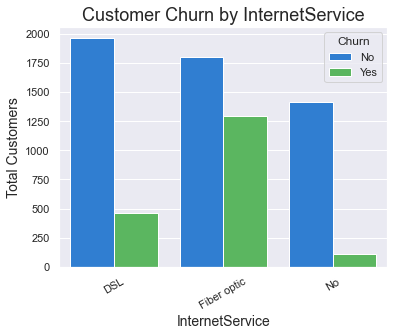

2


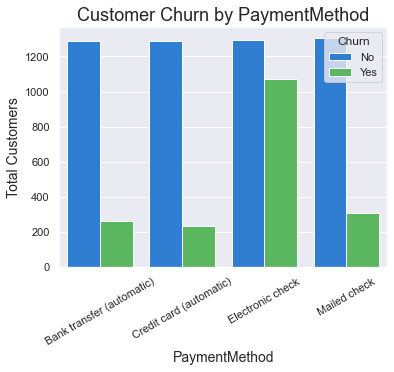

3


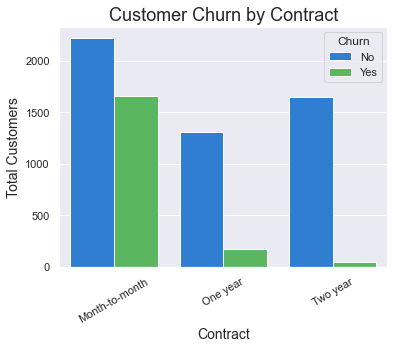

In [61]:
# Choose a few features to look into with regards to churn
cols_vis = ['InternetService','PaymentMethod','Contract']
sns.set()
cust_pal = ['#157DEC','#4CC552']
sns.set_palette(cust_pal)

for i in range(0,len(cols_vis)):
    plt.figure(figsize=[20,15])
    plt.subplot(3,3,i+1)
    print(i+1)
    df_plot = pd.DataFrame(df.groupby([cols_vis[i],'Churn'])['Churn'].count())
    df_plot.rename(columns = {'Churn': 'TotalCustomers'}, inplace=True)
    df_plot.reset_index(inplace = True)
    chart = sns.barplot(x=cols_vis[i], y='TotalCustomers', hue="Churn", data=df_plot)
    plt.ylabel("Total Customers", size=14)
    plt.xlabel(cols_vis[i], size=14)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
    plt.title("Customer Churn by " + cols_vis[i], size=18)
    plt.show()

In [107]:
import requests
import json

url = 'http://127.0.0.1:5000/predict'
data ={"tenure":1,
         "PhoneService":"No",
         "Contract":"Month-to-month",
         "PaperlessBilling":"Yes",
         "PaymentMethod":"Electronic check",
         "MonthlyCharges":29.85,
         "TotalCharges":29.85,"Churn":"No",
         "gender":"Female",
         "SeniorCitizen":0,
         "Partner":"Yes",
         "Dependents":"No",
         "MultipleLines":"No phone service",
         "InternetService":"DSL",
         "OnlineSecurity":"No",
         "OnlineBackup":"Yes",
         "DeviceProtection":"No",
         "TechSupport":"No",
         "StreamingTV":"No",
         "StreamingMovies":"No"}
response = requests.post(url, json = data)
response.json()

{'predicted_churn': '0', 'predicted_proba_churn': '0.511'}